<a href="https://colab.research.google.com/github/sahoosujit/GolangTraining/blob/master/ML_assignment_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
from pandas_profiling import ProfileReport
from google.colab import files

warnings.filterwarnings('ignore')

In [2]:
uploaded = files.upload()

Saving adult.csv to adult.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['adult.csv']))

In [4]:
df.shape

(48842, 15)

In [5]:
df=df.rename(columns={"income":"Incomeabove50k"})

In [43]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,Incomeabove50k
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,N
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,N
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,Y
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,Y
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47923,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,N
47924,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,Y
47925,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,N
47926,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,N


In [7]:
df.loc[df.Incomeabove50k == "<=50K", "Incomeabove50k"] = "N"

In [8]:
df.loc[df.Incomeabove50k == ">50K", "Incomeabove50k"] = "Y"

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [10]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
Incomeabove50k     0
dtype: int64

In [11]:
df[df=='?'].count()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
Incomeabove50k        0
dtype: int64

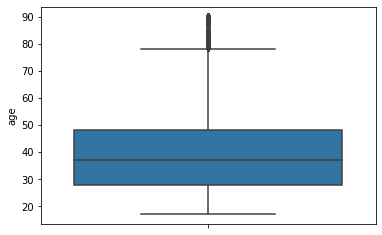

In [12]:
sns.boxplot( y=df["age"] );
plt.show()

Detecting outlier using Z score
Using Z score Formula for Z score = (Observation — Mean)/Standard Deviation

z = (X — μ) / **σ**

In [15]:
import numpy as np
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [16]:
outlier_age=detect_outliers(df["age"])

In [17]:
outlier_age

[80,
 90,
 80,
 81,
 82,
 83,
 81,
 85,
 80,
 90,
 81,
 84,
 81,
 89,
 81,
 83,
 81,
 82,
 80,
 90,
 81,
 83,
 80,
 90,
 90,
 84,
 80,
 80,
 80,
 81,
 90,
 85,
 90,
 81,
 81,
 80,
 80,
 81,
 80,
 88,
 87,
 90,
 83,
 80,
 90,
 81,
 81,
 90,
 82,
 90,
 87,
 81,
 88,
 80,
 81,
 80,
 81,
 90,
 88,
 89,
 84,
 80,
 80,
 83,
 81,
 90,
 80,
 81,
 90,
 88,
 90,
 90,
 80,
 90,
 81,
 82,
 81,
 80,
 83,
 90,
 90,
 81,
 90,
 90,
 80,
 90,
 90,
 84,
 90,
 80,
 90,
 81,
 83,
 84,
 81,
 85,
 82,
 80,
 90,
 90,
 90,
 84,
 80,
 90,
 90,
 84,
 90,
 90,
 90,
 90,
 82,
 81,
 90,
 84,
 81,
 82,
 81,
 80,
 90,
 80,
 84,
 82,
 90,
 84,
 90,
 83,
 81,
 80,
 80,
 80,
 90,
 90,
 80,
 90,
 90,
 81,
 83,
 82,
 90,
 90,
 81,
 80,
 80,
 90,
 80,
 82,
 85,
 80,
 90,
 81,
 80,
 81,
 82,
 88,
 90,
 82,
 88,
 84,
 83,
 86,
 90,
 90,
 82,
 83,
 81,
 90,
 80,
 81,
 84,
 84,
 90,
 80,
 81,
 81,
 81,
 90,
 87,
 90,
 80,
 80,
 82,
 90,
 90,
 85,
 82,
 81]

In [18]:
outlier_hw=detect_outliers(df["hours-per-week"])

In [19]:
outlier_hw

[80,
 90,
 80,
 81,
 82,
 83,
 81,
 85,
 80,
 90,
 81,
 84,
 81,
 89,
 81,
 83,
 81,
 82,
 80,
 90,
 81,
 83,
 80,
 90,
 90,
 84,
 80,
 80,
 80,
 81,
 90,
 85,
 90,
 81,
 81,
 80,
 80,
 81,
 80,
 88,
 87,
 90,
 83,
 80,
 90,
 81,
 81,
 90,
 82,
 90,
 87,
 81,
 88,
 80,
 81,
 80,
 81,
 90,
 88,
 89,
 84,
 80,
 80,
 83,
 81,
 90,
 80,
 81,
 90,
 88,
 90,
 90,
 80,
 90,
 81,
 82,
 81,
 80,
 83,
 90,
 90,
 81,
 90,
 90,
 80,
 90,
 90,
 84,
 90,
 80,
 90,
 81,
 83,
 84,
 81,
 85,
 82,
 80,
 90,
 90,
 90,
 84,
 80,
 90,
 90,
 84,
 90,
 90,
 90,
 90,
 82,
 81,
 90,
 84,
 81,
 82,
 81,
 80,
 90,
 80,
 84,
 82,
 90,
 84,
 90,
 83,
 81,
 80,
 80,
 80,
 90,
 90,
 80,
 90,
 90,
 81,
 83,
 82,
 90,
 90,
 81,
 80,
 80,
 90,
 80,
 82,
 85,
 80,
 90,
 81,
 80,
 81,
 82,
 88,
 90,
 82,
 88,
 84,
 83,
 86,
 90,
 90,
 82,
 83,
 81,
 90,
 80,
 81,
 84,
 84,
 90,
 80,
 81,
 81,
 81,
 90,
 87,
 90,
 80,
 80,
 82,
 90,
 90,
 85,
 82,
 81,
 90,
 84,
 80,
 84,
 80,
 99,
 80,
 80,
 96,
 90,
 3,
 1,
 99,
 80,
 8

In [20]:
df2=df[~df['hours-per-week'].isin(outlier_hw)]

In [21]:
outlier_age=detect_outliers(df2["age"])

In [22]:
outlier_age

[80,
 90,
 80,
 81,
 82,
 83,
 81,
 85,
 80,
 90,
 81,
 84,
 81,
 89,
 81,
 83,
 81,
 82,
 80,
 90,
 81,
 83,
 80,
 90,
 90,
 84,
 80,
 80,
 80,
 81,
 90,
 85,
 90,
 81,
 81,
 80,
 80,
 81,
 80,
 88,
 87,
 90,
 83,
 80,
 90,
 81,
 81,
 90,
 82,
 90,
 87,
 81,
 88,
 80,
 81,
 80,
 81,
 90,
 88,
 89,
 84,
 80,
 80,
 83,
 81,
 90,
 80,
 81,
 90,
 88,
 90,
 90,
 80,
 90,
 81,
 82,
 81,
 80,
 83,
 90,
 90,
 81,
 90,
 90,
 80,
 90,
 90,
 84,
 90,
 80,
 90,
 81,
 83,
 84,
 81,
 85,
 82,
 80,
 90,
 90,
 90,
 84,
 80,
 90,
 90,
 84,
 90,
 90,
 90,
 90,
 82,
 81,
 90,
 84,
 81,
 82,
 81,
 80,
 90,
 80,
 84,
 82,
 90,
 84,
 90,
 83,
 81,
 80,
 80,
 80,
 90,
 90,
 80,
 90,
 90,
 81,
 83,
 82,
 90,
 90,
 81,
 80,
 80,
 90,
 80,
 82,
 85,
 80,
 90,
 81,
 80,
 81,
 82,
 88,
 90,
 82,
 88,
 84,
 83,
 86,
 90,
 90,
 82,
 83,
 81,
 90,
 80,
 81,
 84,
 84,
 90,
 80,
 81,
 81,
 81,
 90,
 87,
 90,
 80,
 80,
 82,
 90,
 90,
 85,
 82,
 81,
 90,
 84,
 80,
 84,
 80,
 99,
 80,
 80,
 96,
 90,
 3,
 1,
 99,
 80,
 8

In [23]:
#select the data without the outliers
df3=df2[~df2['age'].isin(outlier_age)]

In [24]:
df.shape

(48842, 15)

In [25]:
df3.shape

(47928, 15)

In [26]:
df3 = df3.reset_index(drop=True)
df=df3
df.shape

(47928, 15)

In [27]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,Incomeabove50k
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,N
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,N
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,Y
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,Y
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47923,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,N
47924,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,Y
47925,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,N
47926,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,N


In [28]:
from sklearn.preprocessing import StandardScaler
scalling = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = df.select_dtypes(include=['float64','int64']).columns
print(cols)
scale_train = scalling.fit_transform(df.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
scale_traindf = pd.DataFrame(scale_train, columns = cols)
scale_traindf.shape

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


(47928, 6)

In [29]:
scale_traindf

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.000415,0.348612,-1.203940,-0.144094,-0.217173,-0.005367
1,-0.026375,-0.948102,-0.422461,-0.144094,-0.217173,0.890236
2,-0.775636,1.391270,0.749757,-0.144094,-0.217173,-0.005367
3,0.423183,-0.280671,-0.031722,0.902958,-0.217173,-0.005367
4,-1.524898,-0.818580,-0.031722,-0.144094,-0.217173,-0.900970
...,...,...,...,...,...,...
47923,-0.850563,0.637321,0.749757,-0.144094,-0.217173,-0.184487
47924,0.123478,-0.336984,-0.422461,-0.144094,-0.217173,-0.005367
47925,1.472149,-0.360308,-0.422461,-0.144094,-0.217173,-0.005367
47926,-1.225193,0.109011,-0.422461,-0.144094,-0.217173,-1.796573


In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cat_df = df.select_dtypes(include=['object']).copy()

# encode the categorical attributes
enc_cat = cat_df.apply(encoder.fit_transform)
# separate target column from encoded data 
encdtrain = enc_cat.drop(['Incomeabove50k'], axis=1)
enccat_Ytrain = enc_cat['Incomeabove50k'].copy()


In [31]:
enc_cat

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,Incomeabove50k
0,4,1,4,7,3,2,1,39,0
1,4,11,2,5,0,4,1,39,0
2,2,7,2,11,0,4,1,39,1
3,4,15,2,7,0,2,1,39,1
4,0,15,4,0,3,4,0,39,0
...,...,...,...,...,...,...,...,...,...
47923,4,7,2,13,5,4,0,39,0
47924,4,11,2,7,0,4,1,39,1
47925,4,11,6,1,4,4,0,39,0
47926,4,11,4,1,3,4,1,39,0


In [32]:
x = pd.concat([scale_traindf, encdtrain], axis=1, join="inner")
y = enccat_Ytrain
x.shape

(47928, 14)

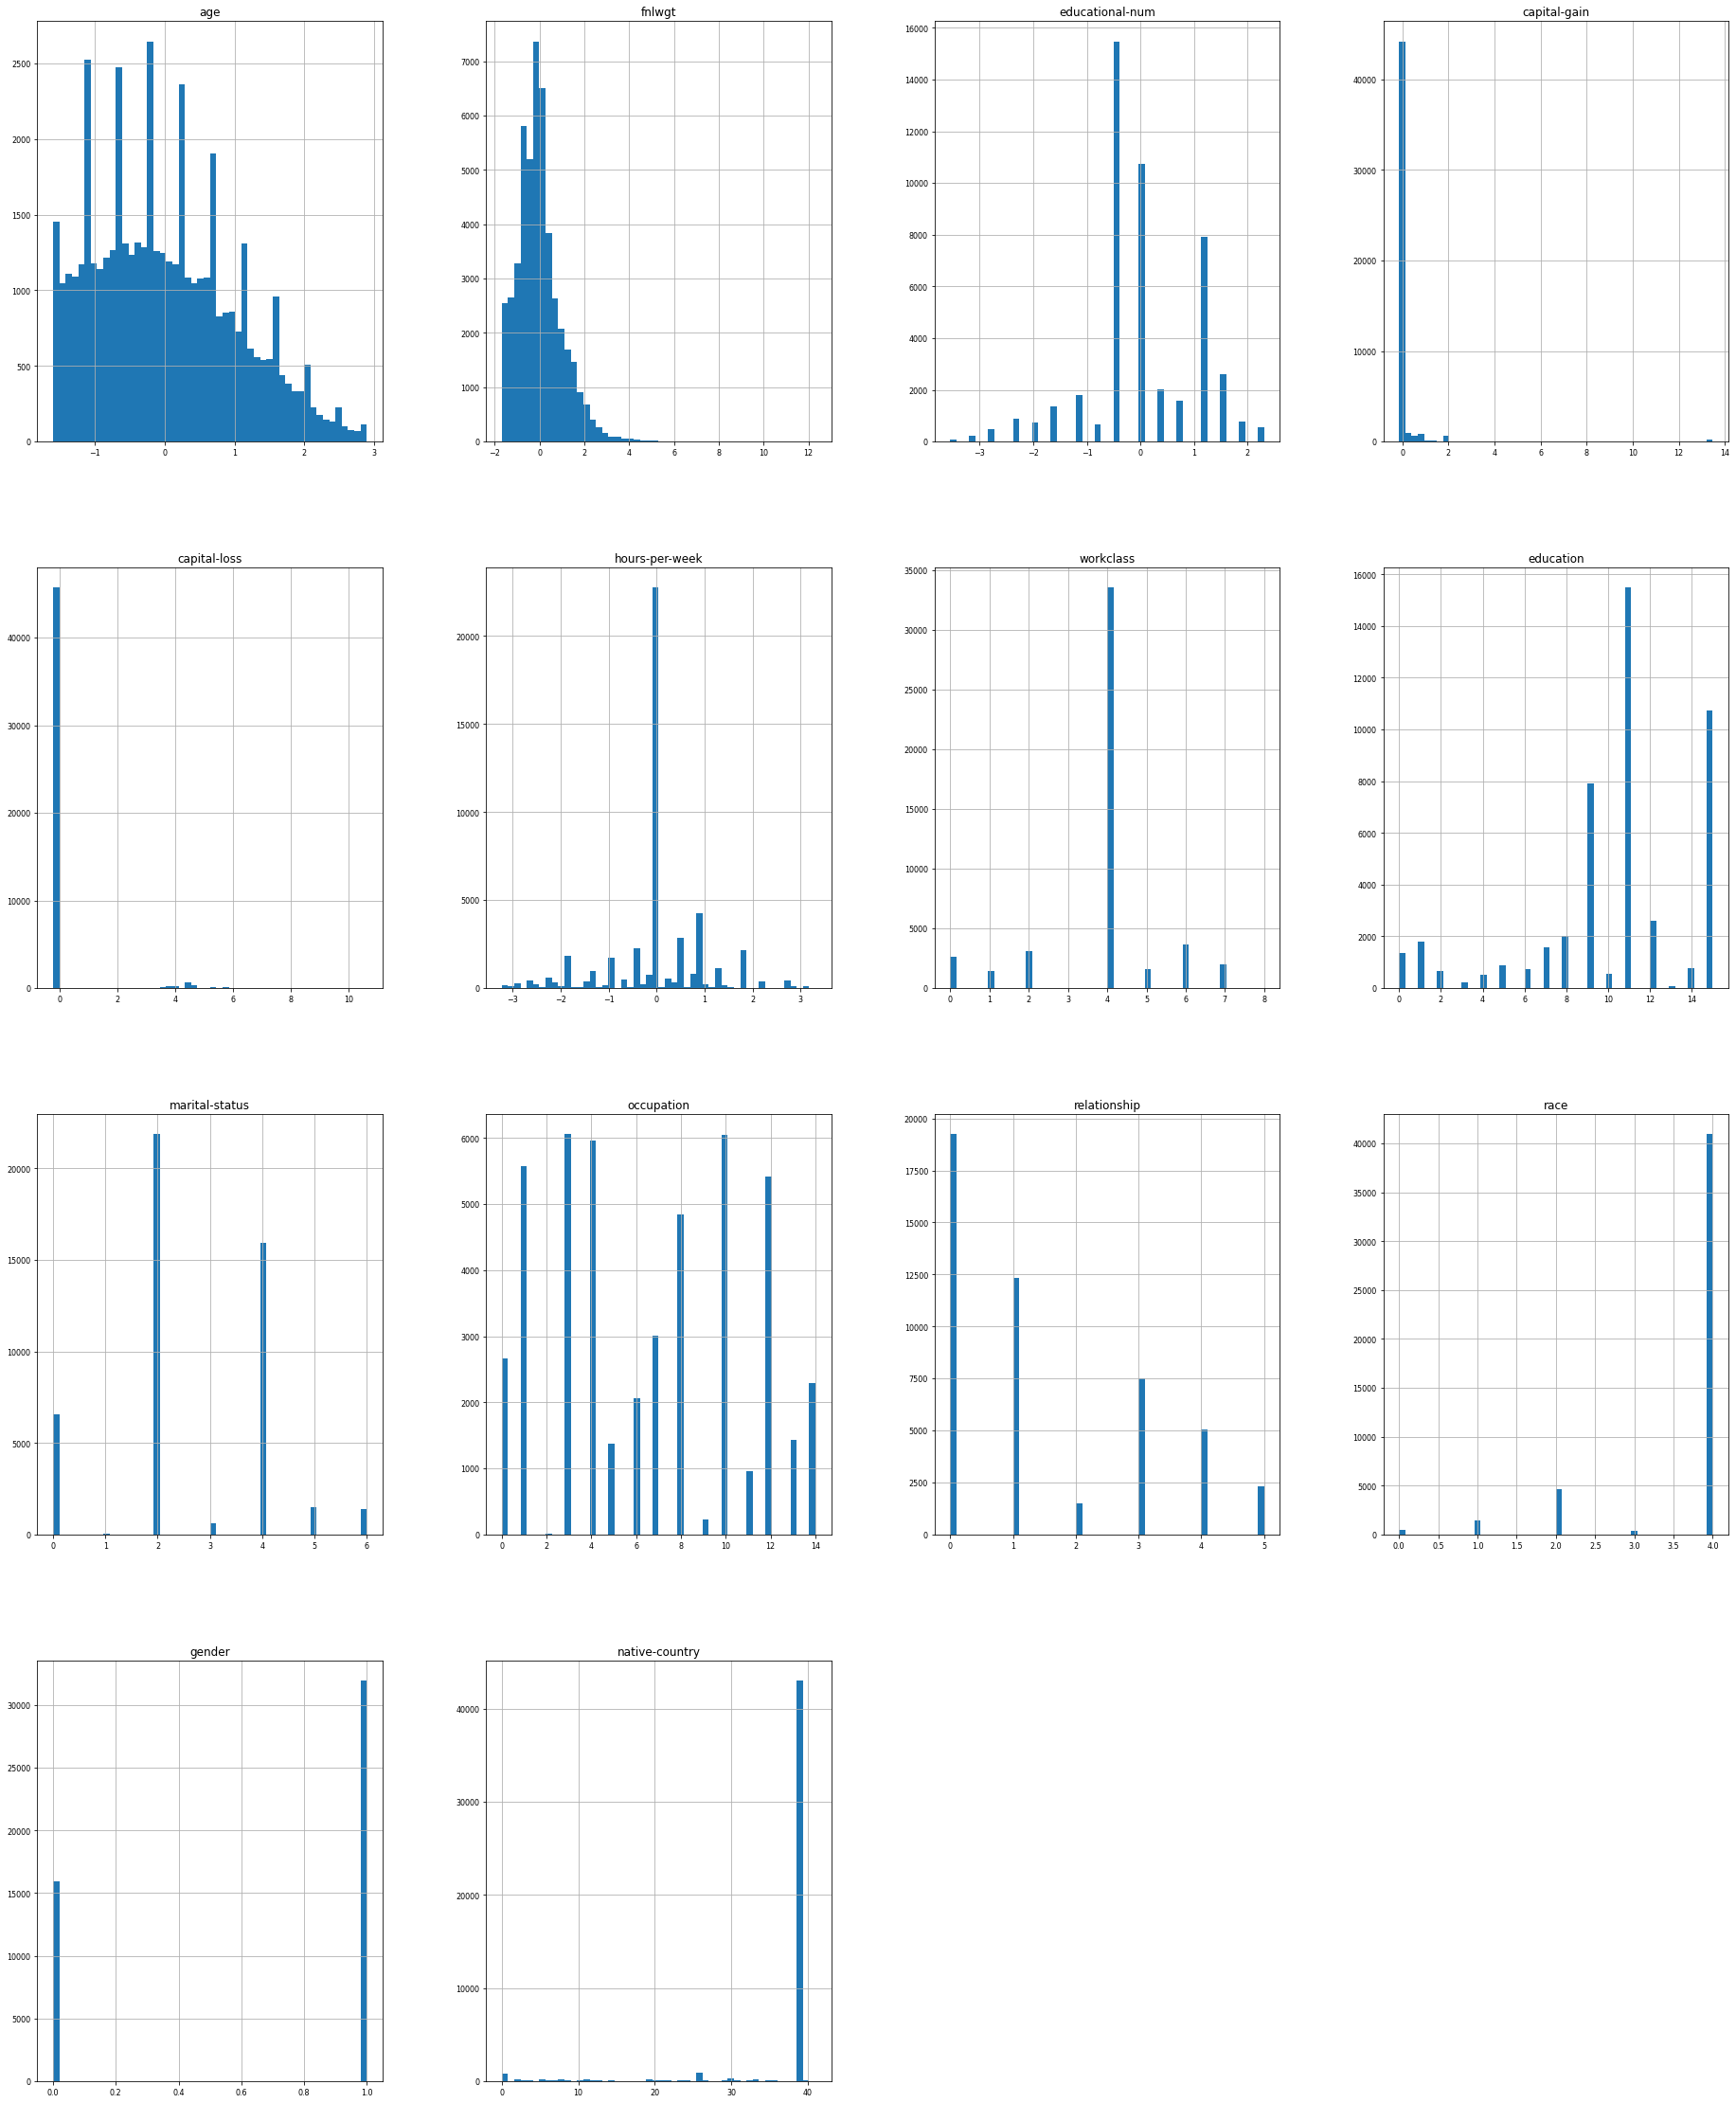

In [33]:
x.hist(figsize=(32, 40), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [34]:
#split the train and test data
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y,train_size=0.70, random_state=2)

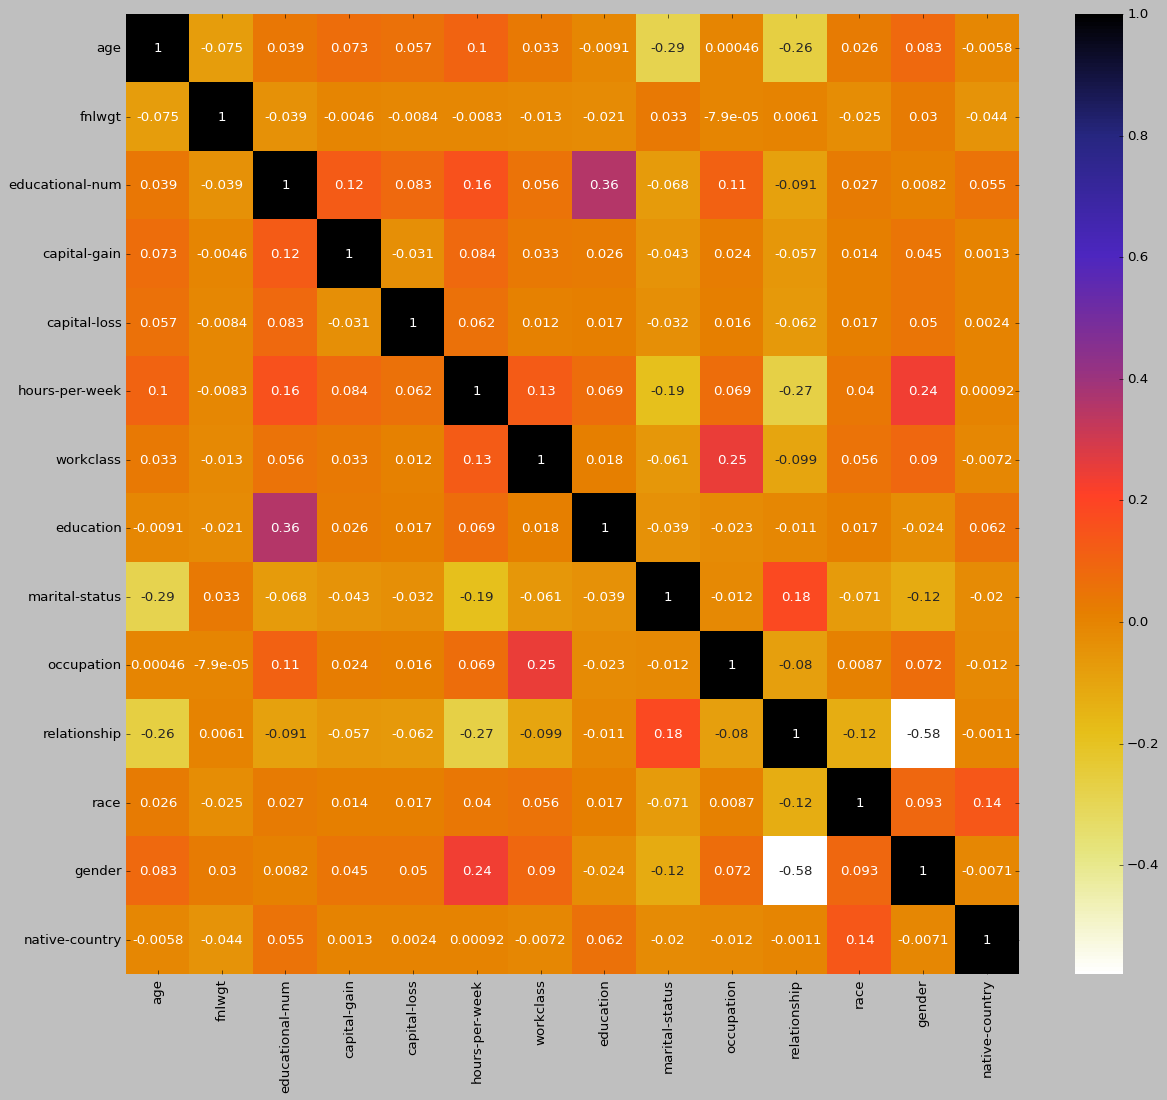

In [35]:
import seaborn as sns
plt.style.use('classic')
#Using Pearson Correlation
plt.figure(figsize=(18,15))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
import matplotlib.pyplot as plt
plt.show()

In [36]:
# below function is to find out and remove highly corelated features provided by the threshhold

def check_corr_del(dataset, threshold):
    corr_col = set()  # Set to have a unique list of feature names
    corr_mat = dataset.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                columnname = corr_mat.columns[i]  # getting the name of column
                corr_col.add(columnname)
    return corr_col

In [37]:
correlated_features = check_corr_del(X_train, 0.7)
len(set(correlated_features))

0

In [38]:
correlated_features

set()

In [39]:
#drop the highly corelated features from both Train and Test data
X_train=X_train.drop(correlated_features,axis=1)
X_test=X_test.drop(correlated_features,axis=1)

In [40]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Train the model for  KNeighborsClassifier
KNN = KNeighborsClassifier(n_jobs=-1)
KNN.fit(X_train, Y_train); 

# Train the model for  LogisticRegression 
LGR = LogisticRegression(n_jobs=-1, random_state=0)
LGR.fit(X_train, Y_train);

# Train the model for Gaussian Naive Baye Model
BNB = GaussianNB()
BNB.fit(X_train, Y_train)
            
# Train the model for Decision Tree
DTC = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC.fit(X_train, Y_train)

# Train the model for Randomforest Classifier
RFC = RandomForestClassifier(n_jobs=-1, random_state=0)
RFC.fit(X_train, Y_train);

In [41]:
from sklearn import metrics

models = []
models.append(('Naive Baye Classifier', BNB))
models.append(('Decision Tree Classifier', DTC))
models.append(('KNeighborsClassifier', KNN))
models.append(('LogisticRegression', LGR))
models.append(('RandomForestClassifier', RFC))

for i, j in models:
    scores = cross_val_score(j, X_train,Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, j.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, j.predict(X_train))
    classification = metrics.classification_report(Y_train, j.predict(X_train))
    print()
    print('============================== {} Model Evaluation With Training Data =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Naive Baye Classifier Model Evaluation With Training Data ==============================

Cross Validation Mean Score:
 0.8031537937218456

Model Accuracy:
 0.8031237890846225

Confusion matrix:
 [[24297  1314]
 [ 5291  2647]]

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88     25611
           1       0.67      0.33      0.44      7938

    accuracy                           0.80     33549
   macro avg       0.74      0.64      0.66     33549
weighted avg       0.78      0.80      0.78     33549



============================== Decision Tree Classifier Model Evaluation With Training Data ==============================

Cross Validation Mean Score:
 0.8176700818561283

Model Accuracy:
 0.999970192852246

Confusion matrix:
 [[25611     0]
 [    1  7937]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    

In [42]:
for i, j in models:
    accuracy = metrics.accuracy_score(Y_test, j.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, j.predict(X_test))
    classification = metrics.classification_report(Y_test, j.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print() 


============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.8006815494818833

Confusion matrix:
 [[10354   520]
 [ 2346  1159]]

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88     10874
           1       0.69      0.33      0.45      3505

    accuracy                           0.80     14379
   macro avg       0.75      0.64      0.66     14379
weighted avg       0.78      0.80      0.77     14379



============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.8106266082481397

Confusion matrix:
 [[9488 1386]
 [1337 2168]]

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87     10874
           1       0.61      0.62      0.61      3505

    accuracy                           0.81     14379
   macro avg       0.